In [1]:
%matplotlib notebook

import matplotlib as mpl
#import DataSetQuery
import datetime
import pandas as pd
#import MalardHelpers
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
from DataSets import *

<IPython.core.display.Javascript object>


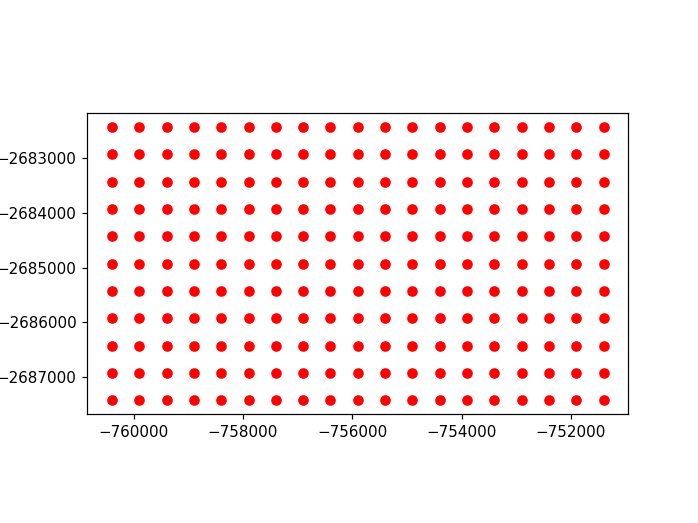

In [5]:
dfStats = gp.read_file("regression_results/iceland5.gpkg")

dfStats.plot(color='red')


In [ ]:
print(dfStats.crs)
print('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
print('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
print('+proj=stere +lat_0=90 +lat_ts=71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs ')

In [14]:
dfStats

,maxX,maxY,minX,minY,regression.rsquared,regression.c,regression.c.se,regression.c.year,regression.c.se.year,regression.const,...,regression.w_coh.const.conf_interval.low,regression.w_coh.const.conf_interval.high,geometry,noel_rate,noel_measurements,noel_measurements2,measurementsDiff,measurementsDiffPercent,regression_diff.power,regression_diff.robust
0,-759900.25,-2681927.25,-760900.25,-2682927.25,0.881229,-5.059800e-08,4.705556e-09,-1.595659,0.148394,-197082.289855,...,-197934.514799,-188756.801363,POINT (-760400.25 -2682427.25),-1.819022,743.0,739.0,479.0,64.817321,0.020167,0.284900
1,-759400.25,-2681927.25,-760400.25,-2682927.25,0.833594,-5.034204e-08,6.266069e-09,-1.587586,0.197607,-207628.559965,...,-213778.620130,-199910.488186,POINT (-759900.25 -2682427.25),-2.160701,609.0,607.0,396.0,65.238880,0.118715,0.574294
2,-758900.25,-2681927.25,-759900.25,-2682927.25,0.801710,-5.137631e-08,9.284118e-09,-1.620203,0.292784,-214837.980736,...,-198716.535827,-179595.282568,POINT (-759400.25 -2682427.25),-0.855376,463.0,447.0,288.0,64.429530,1.212837,0.766349
3,-758400.25,-2681927.25,-759400.25,-2682927.25,0.754782,-6.166526e-08,1.482124e-08,-1.944676,0.467403,-204171.943358,...,-221995.507466,-178172.545171,POINT (-758900.25 -2682427.25),-1.799061,192.0,185.0,143.0,77.297297,0.569124,0.083662
4,-757900.25,-2681927.25,-758900.25,-2682927.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,POINT (-758400.25 -2682427.25),-4.439954,54.0,54.0,NaN,NaN,NaN,NaN
5,-757400.25,-2681927.25,-758400.25,-2682927.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,POINT (-757900.25 -2682427.25),-2.693346,14.0,14.0,NaN,NaN,NaN,NaN
6,-756900.25,-2681927.25,-757900.25,-2682927.25,0.840507,-7.035762e-08,3.096664e-08,-2.218798,0.976564,100718.361798,...,57435.695269,152199.007123,POINT (-757400.25 -2682427.25),-0.369677,23.0,20.0,3.0,15.000000,1.700770,1.502915
7,-756400.25,-2681927.25,-757400.25,-2682927.25,0.083387,-6.116892e-08,1.710478e-08,-1.929023,0.539416,-5463.002643,...,-10146.931987,8393.135324,POINT (-756900.25 -2682427.25),-1.712013,199.0,192.0,21.0,10.937500,0.700403,0.546764
8,-755900.25,-2681927.25,-756900.25,-2682927.25,0.384147,-2.190945e-08,3.709484e-09,-0.690937,0.116982,39525.831363,...,36569.246032,42084.402584,POINT (-756400.25 -2682427.25),-0.496624,934.0,906.0,14.0,1.545254,0.031499,0.073788
9,-755400.25,-2681927.25,-756400.25,-2682927.25,0.104772,-2.141714e-08,4.050181e-09,-0.675411,0.127726,41252.271665,...,32891.493969,37269.849741,POINT (-755900.25 -2682427.25),-0.077502,1307.0,1153.0,11.0,0.954033,0.171292,0.225232


In [6]:
raster = RasterDataSet('/data/puma1/scratch/DEMs/Iceland/proj4/rate-small4.tif')
for idx, line in dfStats.iterrows():

    centerX = line['minX']+(abs(line['maxX']-line['minX'])/2)
    centerY = line['minY']+(abs(line['maxY']-line['minY'])/2)
    value = raster.getValuesAt(centerX, centerY)
    dfStats.at[idx, 'noel_rate'] = value

In [7]:
dfStats[['noel_rate', 'regression.w_powerScaled.c.year', 'regression.robust.c.year', 'regression.w_coh.c.year', 'regression.c.year']]

,noel_rate,regression.w_powerScaled.c.year,regression.robust.c.year,regression.w_coh.c.year,regression.c.year
0,-1.819022,-1.798855,-1.534122,-1.546950,-1.595659
1,-2.160701,-2.041986,-1.586407,-1.587705,-1.587586
2,-0.855376,-2.068214,-1.621726,-1.575621,-1.620203
3,-1.799061,-2.368185,-1.882723,-1.839029,-1.944676
4,-4.439954,NaN,NaN,NaN,NaN
5,-2.693346,NaN,NaN,NaN,NaN
6,-0.369677,-2.070448,-1.872593,-2.236308,-2.218798
7,-1.712013,-1.011610,-1.165249,-1.037409,-1.929023
8,-0.496624,-0.528123,-0.570412,-0.542745,-0.690937
9,-0.077502,-0.248794,-0.302734,-0.309928,-0.675411


In [41]:
print('powerScaled ',abs(dfStats['noel_rate']-dfStats['regression.w_powerScaled.c.year']).mean())
print('coh ',abs(dfStats['noel_rate']-dfStats['regression.w_coh.c.year']).mean())
print('robust ',abs(dfStats['noel_rate']-dfStats['regression.robust.c.year']).mean())
print('linear ',abs(dfStats['noel_rate']-dfStats['regression.c.year']).mean())


powerScaled  0.2908033198423251
coh  0.6596556101161832
robust  0.6090095131688755
linear  0.6483106516604953


In [50]:
# not with abs
print('powerScaled ',(dfStats['noel_rate']-dfStats['regression.w_powerScaled.c.year']).mean())
print('coh ',(dfStats['noel_rate']-dfStats['regression.w_coh.c.year']).mean())
print('robust ',(dfStats['noel_rate']-dfStats['regression.robust.c.year']).mean())
print('linear ',(dfStats['noel_rate']-dfStats['regression.c.year']).mean())

powerScaled  -0.25960794753291117
coh  -0.6172458520070994
robust  -0.5853878951750365
linear  -0.5850331590619886


In [17]:
raster = RasterDataSet('/data/puma1/scratch/DEMs/Iceland/proj4/errorCovMat.geotiff')
for idx, line in dfStats.iterrows():
    centerX = line['minX']+(abs(line['maxX']-line['minX'])/2)
    centerY = line['minY']+(abs(line['maxY']-line['minY'])/2)
    value = raster.getValuesAt(centerX, centerY)
    dfStats.at[idx, 'noel_error'] = value

In [18]:
dfStats[['noel_error', 'regression.w_powerScaled.c.se.year', 'regression.robust.c.se.year', 'regression.w_coh.c.se.year', 'regression.c.se.year']]

,noel_error,regression.w_powerScaled.c.se.year,regression.robust.c.se.year,regression.w_coh.c.se.year,regression.c.se.year
0,0.229168,0.129322,0.148236,0.143122,0.148394
1,0.465987,0.185622,0.199899,0.198225,0.197607
2,0.212409,0.265237,0.288671,0.271512,0.292784
3,0.262346,0.416119,0.480591,0.474162,0.467403
4,0.402542,NaN,NaN,NaN,NaN
5,0.242905,NaN,NaN,NaN,NaN
6,0.148242,0.913018,0.438164,1.049998,0.976564
7,0.371878,0.280267,0.215594,0.287973,0.539416
8,0.121583,0.074726,0.085835,0.087665,0.116982
9,0.081352,0.053631,0.057668,0.066007,0.127726


In [11]:
print('powerScaled ',abs(dfStats['noel_error']-dfStats['regression.w_powerScaled.c.se.year']).mean())
print('coh ',abs(dfStats['noel_error']-dfStats['regression.w_coh.c.se.year']).mean())
print('robust ',abs(dfStats['noel_error']-dfStats['regression.robust.c.se.year']).mean())
print('linear ',abs(dfStats['noel_error']-dfStats['regression.c.se.year']).mean())

KeyError: 'noel_error'

In [9]:
raster = RasterDataSet('/data/puma1/scratch/DEMs/Iceland/proj4/nMeasurements.geotiff')
for idx, line in dfStats.iterrows():
    centerX = line['minX']+(abs(line['maxX']-line['minX'])/2)
    centerY = line['minY']+(abs(line['maxY']-line['minY'])/2)
    value = raster.getValuesAt(centerX, centerY)
    dfStats.at[idx, 'noel_measurements'] = value

In [10]:
raster = RasterDataSet('/data/puma1/scratch/DEMs/Iceland/proj4/nMeasurementsUsed.geotiff')
for idx, line in dfStats.iterrows():
    centerX = line['minX']+(abs(line['maxX']-line['minX'])/2)
    centerY = line['minY']+(abs(line['maxY']-line['minY'])/2)
    value = raster.getValuesAt(centerX, centerY)
    dfStats.at[idx, 'noel_measurements2'] = value

In [12]:
dfStats[['noel_measurements','noel_measurements2', 'regression.w_powerScaled.count', 'regression.robust.count', 'regression.w_coh.count', 'regression.count']]

,noel_measurements,noel_measurements2,regression.w_powerScaled.count,regression.robust.count,regression.w_coh.count,regression.count
0,743.0,739.0,258.0,260.0,258.0,260.0
1,609.0,607.0,211.0,211.0,211.0,211.0
2,463.0,447.0,156.0,159.0,156.0,159.0
3,192.0,185.0,42.0,42.0,42.0,42.0
4,54.0,54.0,NaN,NaN,NaN,NaN
5,14.0,14.0,NaN,NaN,NaN,NaN
6,23.0,20.0,17.0,17.0,17.0,17.0
7,199.0,192.0,169.0,171.0,169.0,171.0
8,934.0,906.0,890.0,892.0,890.0,892.0
9,1307.0,1153.0,1130.0,1142.0,1130.0,1142.0


In [12]:
dfStats['measurementsDiff'] = dfStats['noel_measurements2']- dfStats['regression.count']
dfStats['measurementsDiffPercent'] = 100-(dfStats['regression.count']/dfStats['noel_measurements2']*100)
dfStats['regression_diff.power'] = abs(dfStats['regression.w_powerScaled.c.year']-dfStats['noel_rate'])
dfStats['regression_diff.robust'] = abs(dfStats['regression.robust.c.year']-dfStats['noel_rate'])


In [13]:
dfStats[['measurementsDiff', 'measurementsDiffPercent','regression_diff.power', 'regression_diff.robust','noel_rate', 'regression.w_powerScaled.c.year', 'regression.robust.c.year', 'regression.w_coh.c.year', 'regression.c.year']]

,measurementsDiff,measurementsDiffPercent,regression_diff.power,regression_diff.robust,noel_rate,regression.w_powerScaled.c.year,regression.robust.c.year,regression.w_coh.c.year,regression.c.year
0,479.0,64.817321,0.020167,0.284900,-1.819022,-1.798855,-1.534122,-1.546950,-1.595659
1,396.0,65.238880,0.118715,0.574294,-2.160701,-2.041986,-1.586407,-1.587705,-1.587586
2,288.0,64.429530,1.212837,0.766349,-0.855376,-2.068214,-1.621726,-1.575621,-1.620203
3,143.0,77.297297,0.569124,0.083662,-1.799061,-2.368185,-1.882723,-1.839029,-1.944676
4,NaN,NaN,NaN,NaN,-4.439954,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-2.693346,NaN,NaN,NaN,NaN
6,3.0,15.000000,1.700770,1.502915,-0.369677,-2.070448,-1.872593,-2.236308,-2.218798
7,21.0,10.937500,0.700403,0.546764,-1.712013,-1.011610,-1.165249,-1.037409,-1.929023
8,14.0,1.545254,0.031499,0.073788,-0.496624,-0.528123,-0.570412,-0.542745,-0.690937
9,11.0,0.954033,0.171292,0.225232,-0.077502,-0.248794,-0.302734,-0.309928,-0.675411


<IPython.core.display.Javascript object>


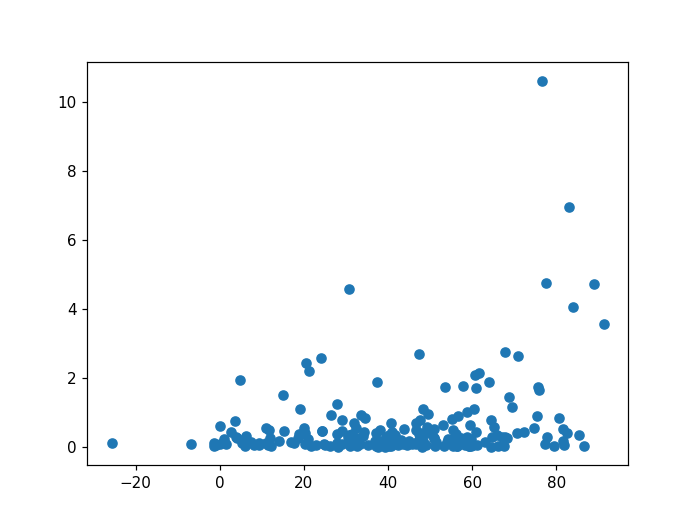

In [15]:
%matplotlib notebook

plt.scatter(x=dfStats['measurementsDiffPercent'], y=dfStats['regression_diff.robust'])

In [21]:
dfStats['regression_error_diff.power'] = abs(dfStats['regression.w_powerScaled.c.se.year']-dfStats['noel_error'])
dfStats['regression_error_diff.robust'] = abs(dfStats['regression.robust.c.se.year']-dfStats['noel_error'])

<IPython.core.display.Javascript object>


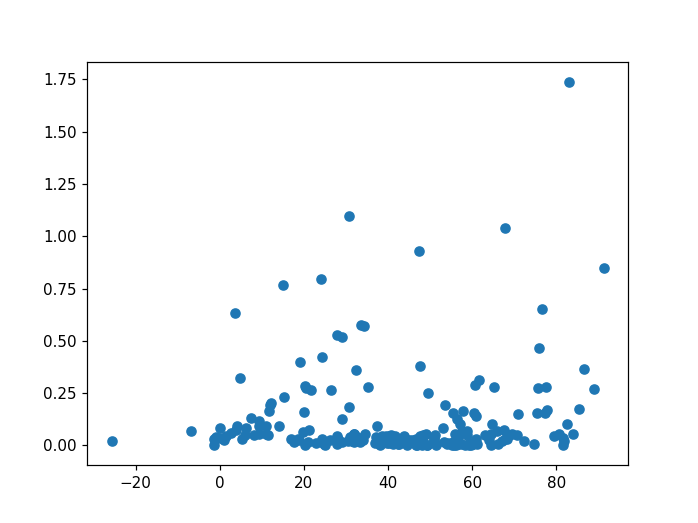

In [22]:
%matplotlib notebook
plt.scatter(x=dfStats['measurementsDiffPercent'], y=dfStats['regression_error_diff.power'])

<IPython.core.display.Javascript object>


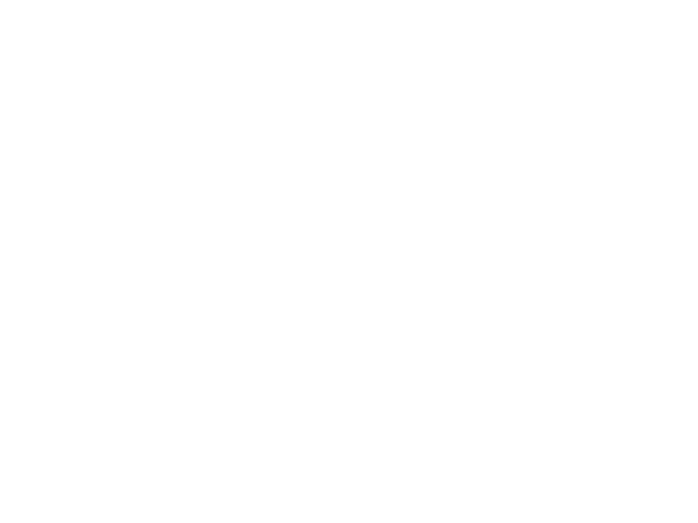

ValueError: color kwarg must have one color per data set. 1 data sets and 3 colors were provided

In [23]:
n_bins=50

fig, ax = plt.subplots()

colors = ['red', 'tan', 'lime']


ax.hist(dfStats['noel_rate'], n_bins, density=True, histtype='bar', color=colors, label=colors)
ax.legend(prop={'size': 10})
ax.set_title('bars with legend')

plt.hist(dfStats['noel_rate'], bins=50, label='noel rate', color='orange')
plt.hist(dfStats['regression.w_powerScaled.c.year'], bins=50, label='powerScaled', color='red')
plt.hist(dfStats['regression.w_coh.c.year'], bins=50, label='coh', color='blue')

<IPython.core.display.Javascript object>


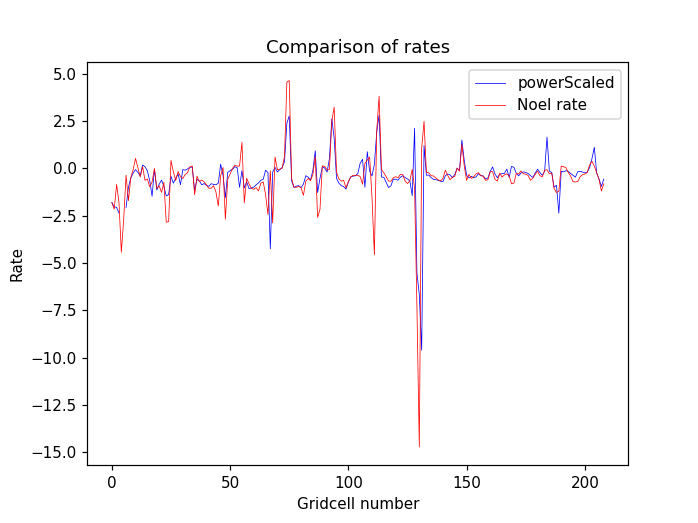

Text(0.5, 1.0, 'Comparison of rates')

In [39]:
%matplotlib notebook
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
plt.plot(dfStats['regression.w_powerScaled.c.year'], color='blue', linewidth=0.5, label='powerScaled')
plt.plot(dfStats['noel_rate'], color='red', linewidth=0.5, label='Noel rate')
plt.legend()
plt.xlabel('Gridcell number')
plt.ylabel('Rate')
plt.title('Comparison of rates')

<IPython.core.display.Javascript object>


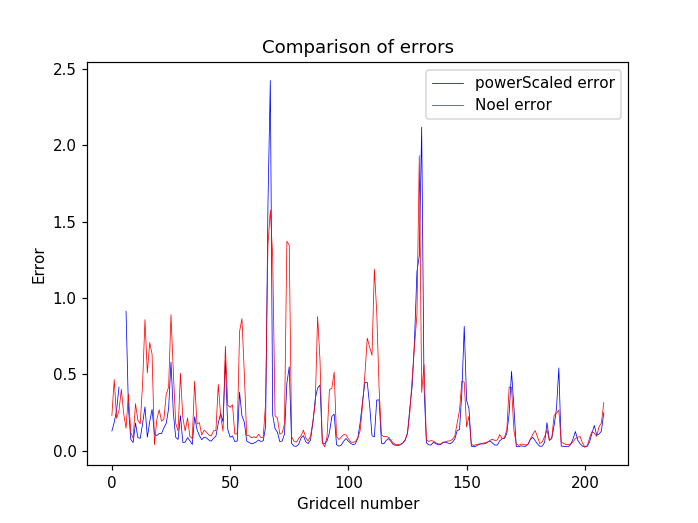

Text(0.5, 1.0, 'Comparison of errors')

In [46]:
%matplotlib notebook
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
conf=dfStats['regression.w_powerScaled.c.year']-dfStats['regression.w_powerScaled.c.conf_interval.low']
plt.plot(dfStats['regression.w_powerScaled.c.se.year'], color='blue', linewidth=0.5, label='powerScaled error')
plt.plot(dfStats['noel_error'], color='red', linewidth=0.5, label='Noel error')
plt.legend()
plt.xlabel('Gridcell number')
plt.ylabel('Error')
plt.title('Comparison of errors')

<IPython.core.display.Javascript object>


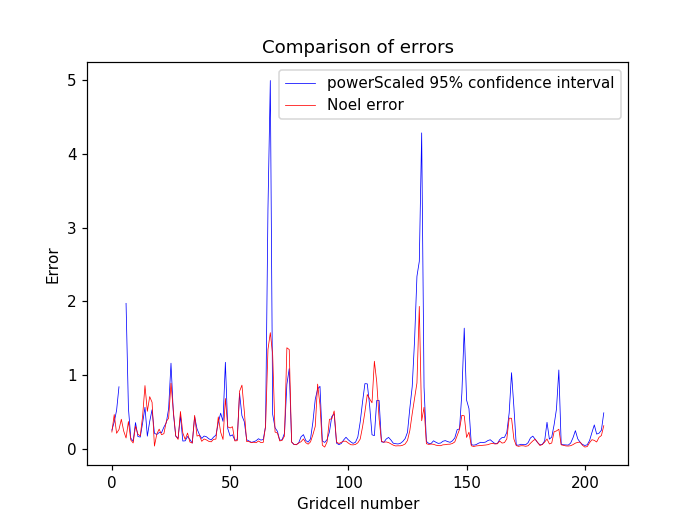

Text(0.5, 1.0, 'Comparison of errors')

In [48]:
%matplotlib notebook
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
conf=dfStats['regression.w_powerScaled.c.year']-dfStats['regression.w_powerScaled.c.conf_interval.low']
plt.plot(conf, color='blue', linewidth=0.5, label='powerScaled 95% confidence interval')
plt.plot(dfStats['noel_error'], color='red', linewidth=0.5, label='Noel error')
plt.legend()
plt.xlabel('Gridcell number')
plt.ylabel('Error')
plt.title('Comparison of errors')

<IPython.core.display.Javascript object>


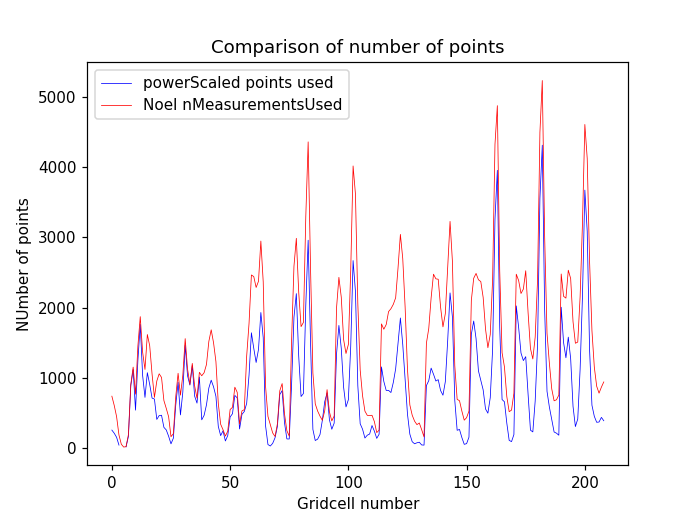

Text(0.5, 1.0, 'Comparison of number of points')

In [44]:
%matplotlib notebook
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
plt.plot(dfStats['regression.w_powerScaled.count']-dfStats['regression.w_powerScaled.count_masked'], color='blue', linewidth=0.5, label='powerScaled points used')
plt.plot(dfStats['noel_measurements2'], color='red', linewidth=0.5, label='Noel nMeasurementsUsed')
plt.legend()
plt.xlabel('Gridcell number')
plt.ylabel('NUmber of points')
plt.title('Comparison of number of points')

<IPython.core.display.Javascript object>


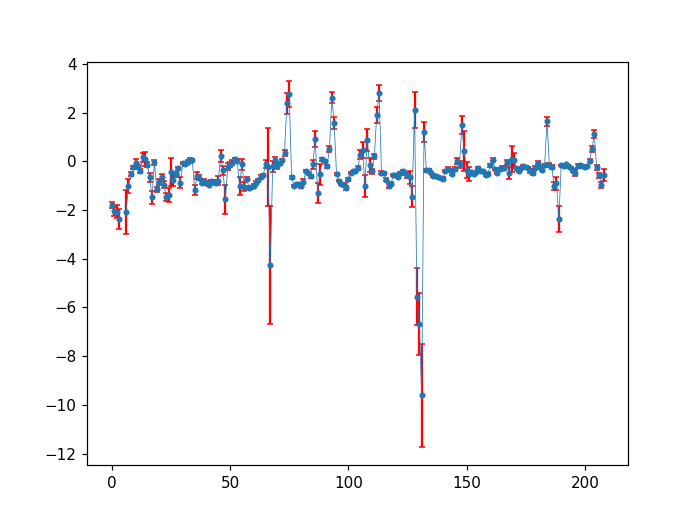

<ErrorbarContainer object of 3 artists>

In [71]:
%matplotlib notebook
x = [5,6,7]
y = [5,7,8]
errors = [1,2,4]
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
#plt.errorbar(x=x,y=y, yerr=errors)
plt.errorbar(y=dfStats['regression.w_powerScaled.c.year'],x=dfStats.index.values, yerr=dfStats['regression.w_powerScaled.c.se.year'], marker='.', ecolor='red', elinewidth=1.5, capsize=2, linewidth=0.5)

<module 'matplotlib.colors' from '/home/earthwave/miniconda3/envs/dev/lib/python3.7/site-packages/matplotlib/colors.py'>

<IPython.core.display.Javascript object>


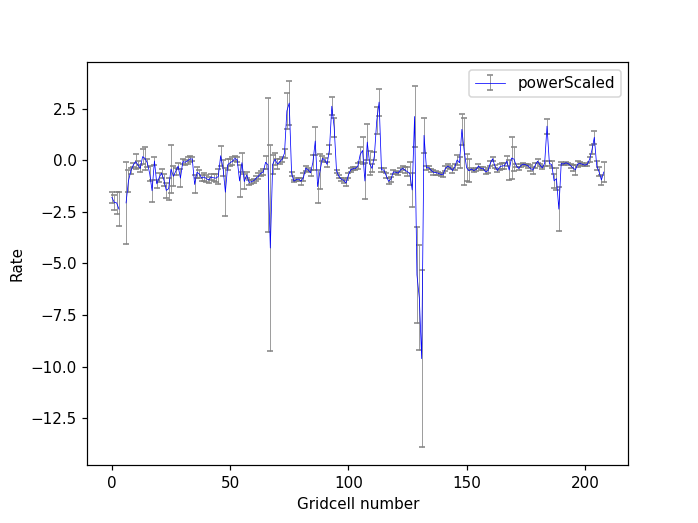

Text(0, 0.5, 'Rate')

In [82]:
%matplotlib notebook
#plt.plot(dfStats['regression.robust.c.year'], color='green', linewidth=0.5)
plt.errorbar(y=dfStats['regression.w_powerScaled.c.year'],x=dfStats.index.values, yerr=conf, color='blue', ecolor='grey', elinewidth=0.5, capsize=2, linewidth=0.5, label='powerScaled')
#plt.errorbar(y=dfStats['noel_rate'], yerr=dfStats['noel_error'],x=dfStats.index.values, color='red', ecolor='grey', elinewidth=0.5, capsize=2, linewidth=0.5, label='Noel rate')
plt.legend()
plt.xlabel('Gridcell number')
plt.ylabel('Rate')
#plt.title('Noel rates')

In [25]:
dfStats.columns


Index(['maxX', 'maxY', 'minX', 'minY', 'regression.rsquared', 'regression.c',
       'regression.c.se', 'regression.c.year', 'regression.c.se.year',
       'regression.const', 'regression.const.se', 'regression.count',
       'regression.const.pvalue', 'regression.c.pvalue',
       'regression.const.tvalue', 'regression.c.tvalue',
       'regression.c.conf_interval.low', 'regression.c.conf_interval.high',
       'regression.const.conf_interval.low',
       'regression.const.conf_interval.high', 'regression.robust.c',
       'regression.robust.c.se', 'regression.robust.c.year',
       'regression.robust.c.se.year', 'regression.robust.const',
       'regression.robust.const.se', 'regression.robust.count',
       'regression.robust.const.pvalue', 'regression.robust.c.pvalue',
       'regression.robust.const.tvalue', 'regression.robust.c.tvalue',
       'regression.robust.c.conf_interval.low',
       'regression.robust.c.conf_interval.high',
       'regression.robust.const.conf_interval.lo